In [19]:
##### setting
### set filename you want to analysis
pkldata = None

if pkldata is None:
    import os
    import smooziee
    pkldata = os.path.join(os.path.dirname(os.path.dirname(smooziee.__file__)), 'data', 'peak_search.pkl')

In [20]:
##### import
from smooziee import fitting
from smooziee import peak_search
import imp
import matplotlib.pyplot as plt
imp.reload(fitting)
imp.reload(peak_search)

<module 'smooziee.peak_search' from '/home/mizokami-ubuntu/Github/smooziee/smooziee/peak_search.py'>

the number of peaks: 9


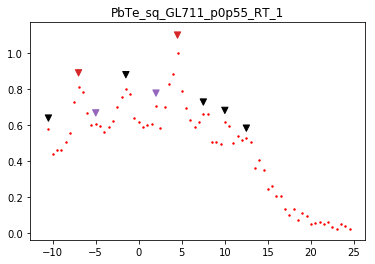

In [21]:
### show peaksearch result
peak_num = fitting.result_peaksearch(pkldata, return_peak_num=True)

In [22]:
### make Fitting class object
fitter = fitting.Fitting(pkldata, ['lorentzian' for i in range(peak_num)])

In [23]:
### set parameters to optimize
## i_peaks -- peak index you want to set
## param_names -- 'amplitude', 'sigma', 'center'
## vary -- True => optimize, False => not optimize
fitter.set_params_vary(i_peaks=list(range(peak_num)), param_names=['center'], vary=False)

In [24]:
### parameters
fitter.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1    1e-08      inf     None     True     None     None
l0_center        -10.5     -inf      inf     None    False     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1    1e-08      inf     None     True     None     None
l1_amplitude         1    1e-08      inf     None     True     None     None
l1_center           -7     -inf      inf     None    False     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1    1e-08      inf     None     True     None     None
l2_amplitude         1    1e-08      inf     None     True 

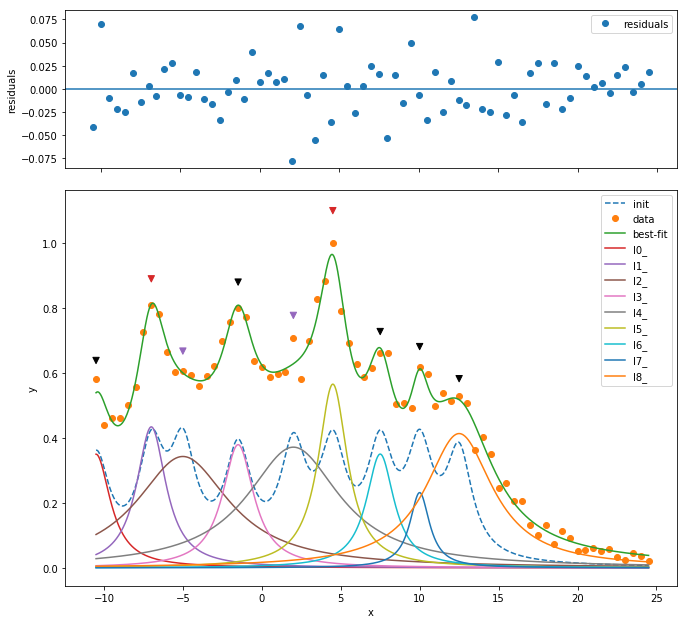

In [25]:
### fit and check
fitter.fit()
fitter.plot(show_init=True, numpoints=1000, eval_components=True)

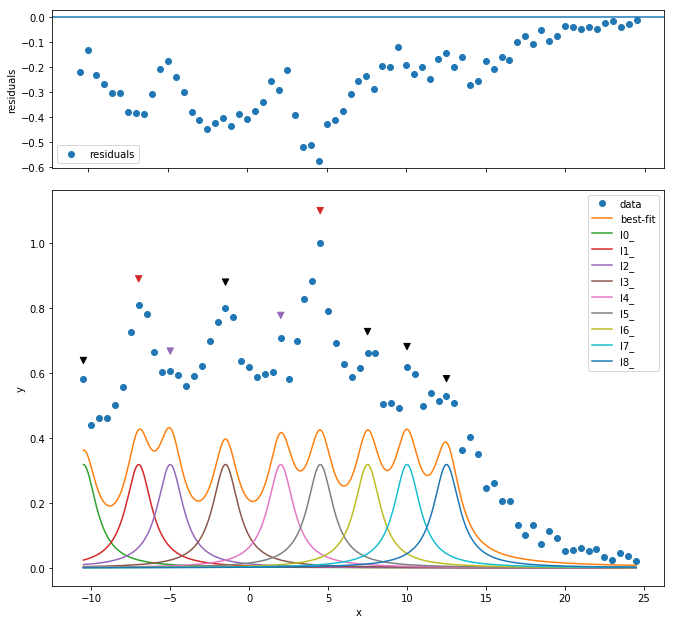

In [26]:
### plot using current param (before fitting)
fitter.plot_from_params(numpoints=1000, eval_components=True)

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     1.214    1e-08      inf   0.4031     True     None     None
l0_center        -10.5     -inf      inf        0    False     None     None
l0_fwhm          2.208     -inf      inf   0.5535    False 2.0000000*l0_sigma     None
l0_height       0.3501     -inf      inf  0.04921    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma         1.104    1e-08      inf   0.2767     True     None     None
l1_amplitude     1.544    1e-08      inf   0.3118     True     None     None
l1_center           -7     -inf      inf        0    False     None     None
l1_fwhm          2.264     -inf      inf   0.2515    False 2.0000000*l1_sigma     None
l1_height       0.4343     -inf      inf  0.05341    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         1.132    1e-08      inf   0.1257     True     None     None
l2_amplitude      3.88    1e-08      inf    1.274     True 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (71,)

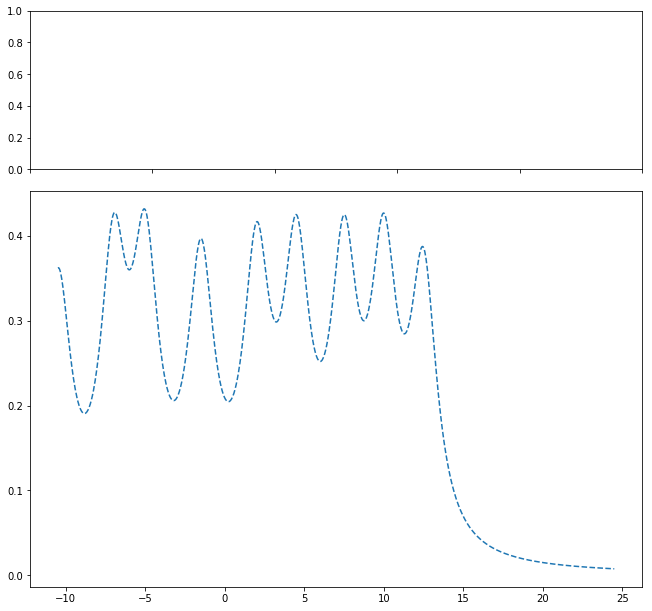

In [27]:
### compare current params and fitted params
### if fitted params are better, overwrite current params
fitter.set_result_param_to_inital()

fitter.params.pretty_print()
fitter.plot(show_init=True, numpoints=1000, eval_components=True)

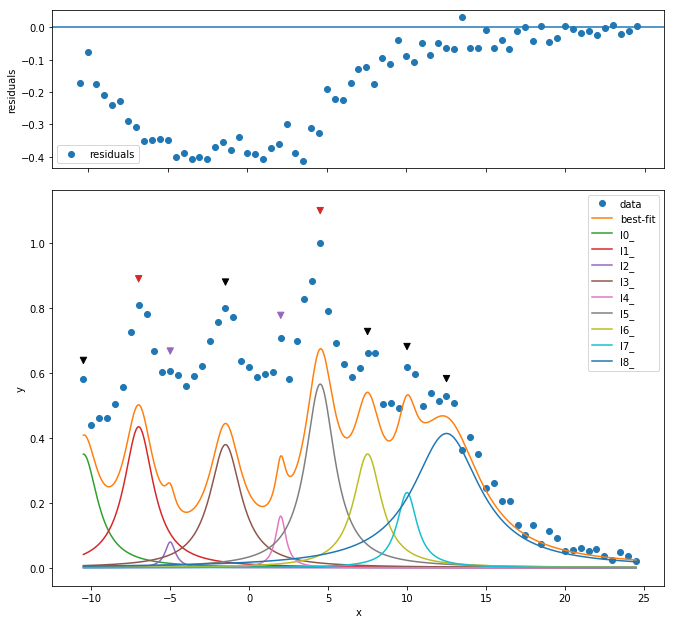

In [16]:
### set params by hand
## param_name = 'amplitude' or 'sigma' or 'center'
fitter.set_params(i_peak=2, param_name='sigma', values={'value': 0.4})
fitter.set_params(i_peak=2, param_name='amplitude', values={'value': 0.1})
fitter.set_params(i_peak=4, param_name='amplitude', values={'value': 0.2})
fitter.plot_from_params(numpoints=1000, eval_components=True)

In [17]:
type(fitter.model)
fitter2 = fitting.load_fitting('result10')

set center using peak pair : [2, 4]
shift is 1.5
['tf_1="A_{1} (7.350, 1.350, 1.350)"\n']


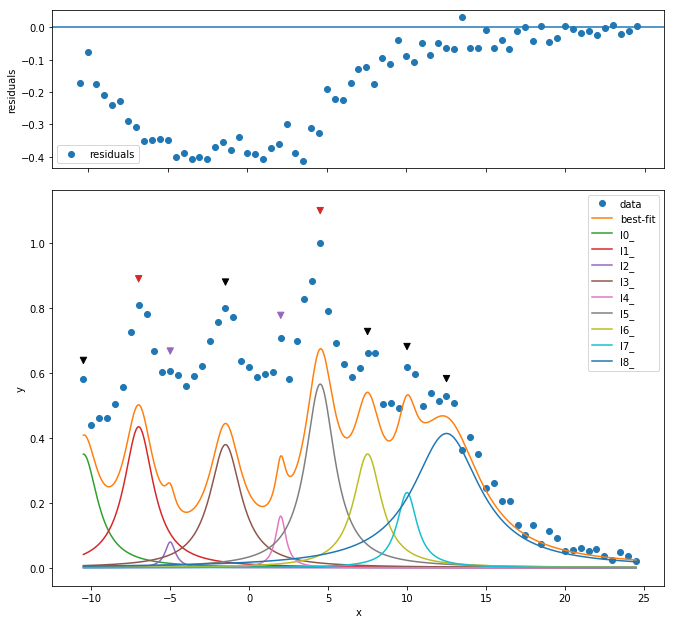

FileExistsError: [Errno 17] File exists: 'result_dump'

In [18]:
fitter.output(gpifile="../data/gpi.PbTe_sq_GL711_p0p55_RT", i_center=2)

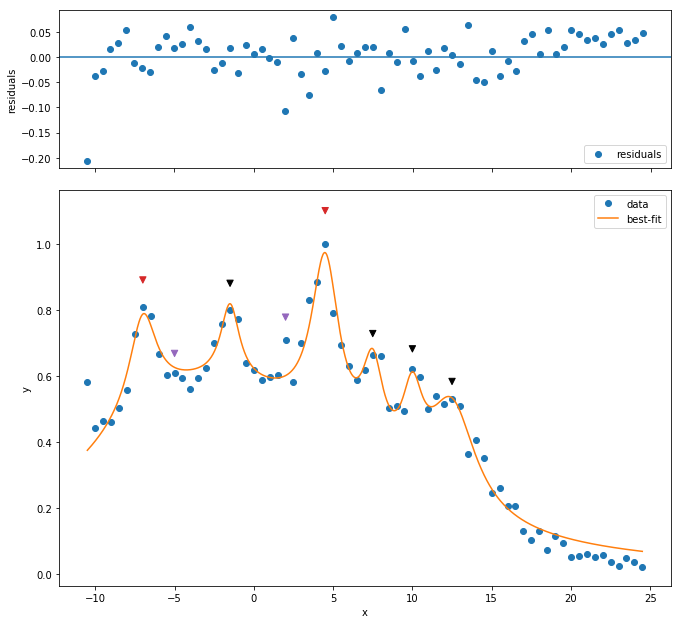

In [216]:
imp.reload(fitting)
fitter2 = fitting.load_fitting("result10")
fitter2.plot_from_params()

In [70]:
import json
with open("aho2", 'w') as f:
    json.dump(fitter.i_peakpairs, f)

In [ ]:
with open("aho2", 'r') as f:
    a   = json.load(f)
print(a)

In [ ]:
a = nya()

In [ ]:
import joblib
joblib.dump(a, "aaa")

In [ ]:
new = joblib.load("aho.pkl")